In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [3]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [4]:
df['WINSORIZE_TOTAL_EXPENDITURE'] = winsorize(df['TOTAL_EXPENDITURE'], (0.05, 0.05))
df['WINSORIZE_TOTAL_REVENUE'] = winsorize(df['TOTAL_REVENUE'], (0.05, 0.05))
df['WINSORIZE_FEDERAL_REVENUE'] = winsorize(df['FEDERAL_REVENUE'], (0.05, 0.05))

df.to_csv('df_winsorize.csv', encoding='utf8', index = False)

In [5]:
df_winsorize = pd.read_csv('df_winsorize.csv')
df_winsorize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

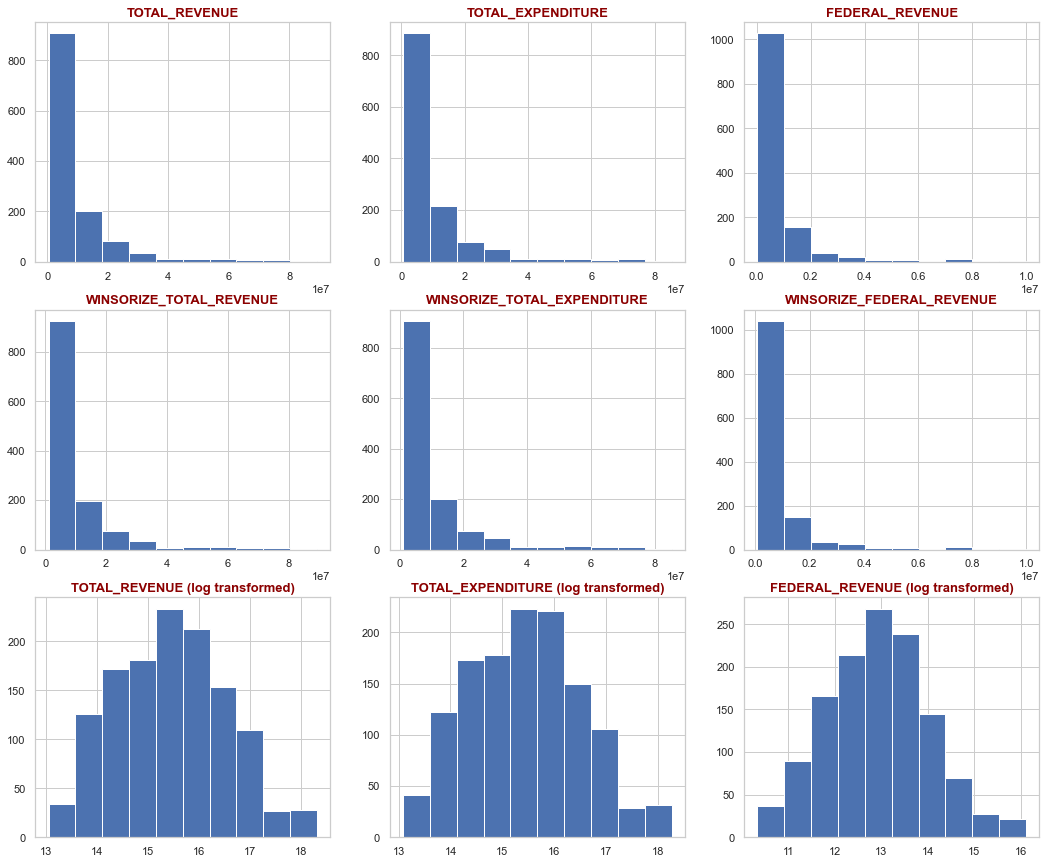

In [6]:
plt.figure(figsize=(18,15))

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE' , 'FEDERAL_REVENUE']
winsorize_variables= ['WINSORIZE_TOTAL_REVENUE', 'WINSORIZE_TOTAL_EXPENDITURE', 'WINSORIZE_FEDERAL_REVENUE']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df[variables[i]]))
    plt.title(variables[i] + ' (log transformed)', fontdict=title_font)

In [7]:
# Firstly, I sorted the years cuz they were unordered. Only then I checked the California State
df2 = df
df2.YEAR.sort_values(ascending=False)
df2 = df2[df2['STATE'] == 'CALIFORNIA']
df2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WINSORIZE_TOTAL_EXPENDITURE,WINSORIZE_TOTAL_REVENUE,WINSORIZE_FEDERAL_REVENUE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,27138832.0,26260025.0,2072470.0
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN,28110986.0,28043338.0,2151157.0
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN,23012688.0,23440845.0,2095878.0
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN,30097549.0,29512214.0,2612241.0
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,NaN,NaN,5686198.0,NaN,NaN,NaN,NaN,31561692.0,31282981.0,2603882.0
259,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,...,3591033.0,1578929.0,5803887.0,NaN,NaN,NaN,NaN,33862281.0,35614934.0,2850766.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,38087666.0,39183018.0,3149260.0
361,1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,...,3734997.0,1675778.0,6038590.0,NaN,NaN,NaN,NaN,40834643.0,41393435.0,3599923.0
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN,45829753.0,46628207.0,4024940.0
463,2001_CALIFORNIA,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,...,3871843.0,1745295.0,6247726.0,NaN,NaN,NaN,NaN,52082540.0,53288943.0,4280358.0


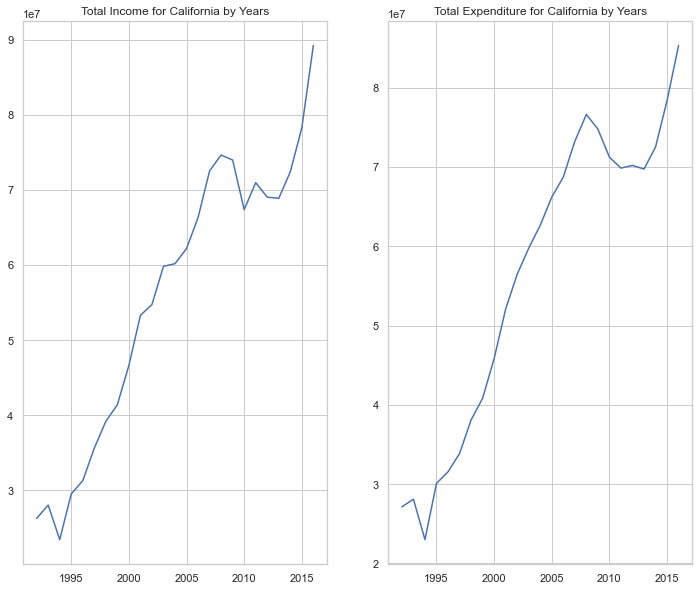

In [8]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.title('Total Income for California by Years')
plt.plot(df2['YEAR'], df2['TOTAL_REVENUE'])

plt.subplot(122)
plt.title('Total Expenditure for California by Years')
plt.plot(df2['YEAR'], df2['TOTAL_EXPENDITURE'])

plt.show()

In [9]:
df2_math = df2['AVG_MATH_8_SCORE']
df2_reading = df2['AVG_READING_8_SCORE']
df2_math.dropna()

4       261.0
412     260.0
565     267.0
667     269.0
769     270.0
871     270.0
973     273.0
1075    276.0
1177    275.0
1307    256.0
1309    277.0
1666    276.0
Name: AVG_MATH_8_SCORE, dtype: float64

In [10]:
df2_reading.dropna()

310     252.0
514     250.0
565     251.0
667     250.0
769     251.0
871     253.0
973     255.0
1075    262.0
1177    259.0
1309    263.0
1666    259.0
Name: AVG_READING_8_SCORE, dtype: float64

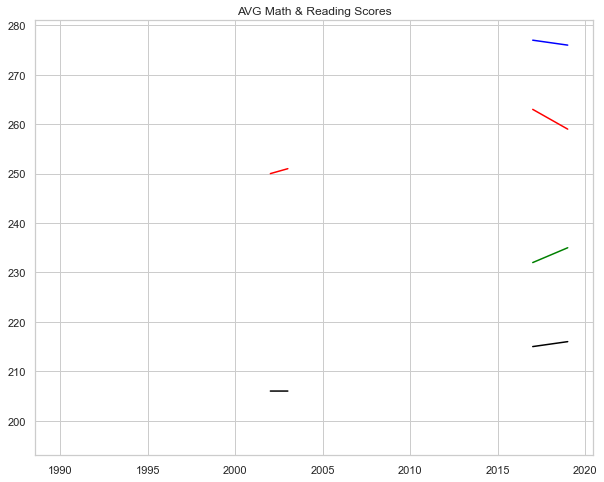

In [11]:
plt.figure(figsize=(10,8))

plt.title('AVG Math & Reading Scores')
plt.plot(df2['YEAR'], df2_math, color = 'blue')
plt.plot(df2['YEAR'], df2_reading, color = 'red')
plt.plot(df2['YEAR'], df2['AVG_MATH_4_SCORE'], color = 'green')
plt.plot(df2['YEAR'], df2['AVG_READING_4_SCORE'], color = 'black')

plt.show()

In [12]:
# There are less information than what we've expected but one can see that both primary and high school students are better in Mathematics than reading.

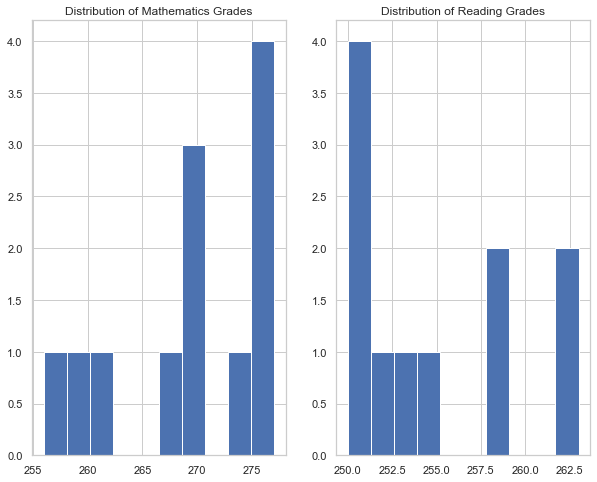

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df2['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df2['AVG_READING_8_SCORE'].dropna())

plt.show()

In [14]:
df2['AVG_MATH_8_SCORE'].fillna(df2['AVG_MATH_8_SCORE'].mean(), inplace=True)
df2['AVG_READING_8_SCORE'].fillna(df2['AVG_READING_8_SCORE'].mean(), inplace=True)


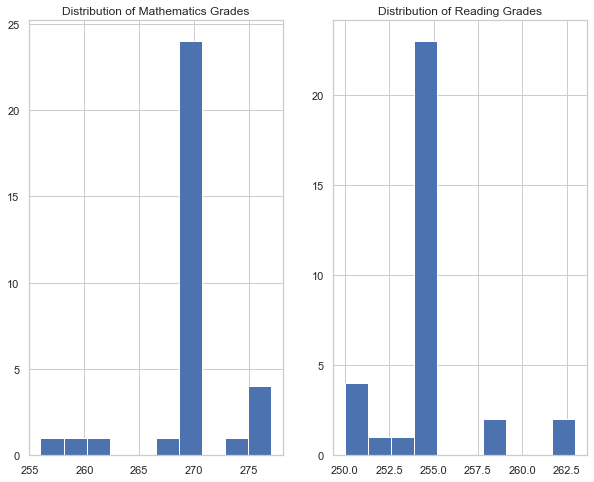

In [15]:
plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df2['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df2['AVG_READING_8_SCORE'].dropna())

plt.show()

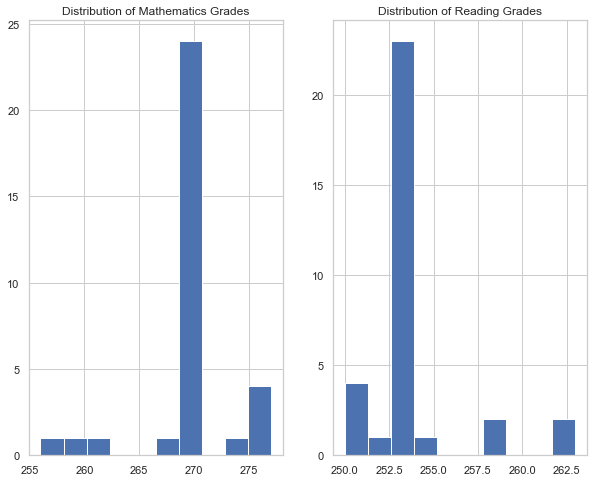

In [16]:
df3 = df
df3.YEAR.sort_values(ascending=False)
df3 = df3[df3['STATE'] == 'CALIFORNIA']

df3['AVG_MATH_8_SCORE'].fillna(df3['AVG_MATH_8_SCORE'].median() , inplace=True)
df3['AVG_READING_8_SCORE'].fillna(df3['AVG_READING_8_SCORE'].median(), inplace=True)

plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df3['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df3['AVG_READING_8_SCORE'].dropna())

plt.show()

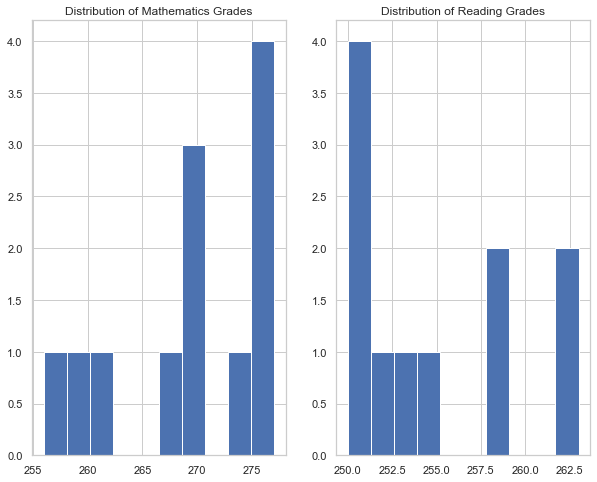

In [17]:
df4 = df
df4.YEAR.sort_values(ascending=False)
df4 = df4[df4['STATE'] == 'CALIFORNIA']

df4.AVG_MATH_8_SCORE.interpolate(method ='linear', limit_direction ='forward')
df4.AVG_READING_8_SCORE.interpolate(method ='linear', limit_direction ='forward')

plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title('Distribution of Mathematics Grades')
plt.hist(df4['AVG_MATH_8_SCORE'].dropna())

plt.subplot(122)
plt.title('Distribution of Reading Grades')
plt.hist(df4['AVG_READING_8_SCORE'].dropna())

plt.show()